In [1]:
#import dependencies
import pandas as pd 
import matplotlib.pyplot as plt
import requests
import json
import scipy.stats as st
import sklearn.datasets as dta
import numpy as np 
from datetime import datetime
import random

import warnings
warnings.filterwarnings('ignore')

In [3]:
#call in csv file and set up API keys
microplastics_csv = pd.read_csv("Resources/MarinePlastics.csv")

In [4]:
#taking columns we need + Adding Regions and Sampling Method - Latitude,Longitude (Alishon)
clean_microplastics = microplastics_csv[["Date","Oceans","Regions","Measurement","Unit","Sampling Method"]]
clean_microplastics.head()

,Date,Oceans,Regions,Measurement,Unit,Sampling Method
0,4/6/2005 12:00:00 AM,Pacific Ocean,NaN,0.00000,pieces/m3,Neuston net
1,2/24/2002 12:00:00 AM,Pacific Ocean,NaN,0.00000,pieces/m3,Neuston net
2,10/25/2010 12:00:00 AM,Pacific Ocean,NaN,0.00216,pieces/m3,Neuston net
3,11/16/2003 12:00:00 AM,Pacific Ocean,NaN,0.00000,pieces/m3,Neuston net
4,3/5/2001 12:00:00 AM,Atlantic Ocean,Caribbean Sea,0.00000,pieces/m3,Neuston net


In [5]:
clean_microplastics["Year"] = pd.Series()
clean_microplastics.head()

,Date,Oceans,Regions,Measurement,Unit,Sampling Method,Year
0,4/6/2005 12:00:00 AM,Pacific Ocean,NaN,0.00000,pieces/m3,Neuston net,NaN
1,2/24/2002 12:00:00 AM,Pacific Ocean,NaN,0.00000,pieces/m3,Neuston net,NaN
2,10/25/2010 12:00:00 AM,Pacific Ocean,NaN,0.00216,pieces/m3,Neuston net,NaN
3,11/16/2003 12:00:00 AM,Pacific Ocean,NaN,0.00000,pieces/m3,Neuston net,NaN
4,3/5/2001 12:00:00 AM,Atlantic Ocean,Caribbean Sea,0.00000,pieces/m3,Neuston net,NaN


In [6]:
#cleaning time column
for i in range(len(clean_microplastics["Date"])):
    date_time = clean_microplastics.loc[i,"Date"]
    date = date_time.split(" ")[0]
    clean_microplastics.loc[i,"Date"]=date
clean_microplastics.head()

,Date,Oceans,Regions,Measurement,Unit,Sampling Method,Year
0,4/6/2005,Pacific Ocean,NaN,0.00000,pieces/m3,Neuston net,NaN
1,2/24/2002,Pacific Ocean,NaN,0.00000,pieces/m3,Neuston net,NaN
2,10/25/2010,Pacific Ocean,NaN,0.00216,pieces/m3,Neuston net,NaN
3,11/16/2003,Pacific Ocean,NaN,0.00000,pieces/m3,Neuston net,NaN
4,3/5/2001,Atlantic Ocean,Caribbean Sea,0.00000,pieces/m3,Neuston net,NaN


In [ ]:
#taking columns we need + Adding Regions and Sampling Method - Latitude,Longitude (Alishon)
# clean_microplastics = microplastics_csv[["Date","Oceans","Regions","Measurement","Unit","Sampling Method"]]
# # clean_microplastics["Year"] = pd.Series()
# clean_microplastics

# df = pd.DataFrame({'date': ['2022-01-01', '2022-02-01', '2022-03-01'],
#                    'value': [10, 20, 30]})
# clean_microplastics["Date"] = pd.to_datetime(clean_microplastics["Date"])  # Convert string dates to datetime objects

# Add a new column 'year' with the year of each date
# clean_microplastics["Year"] = clean_microplastics["Date"].dt.year

# print(clean_microplastics.head())

In [7]:
for x in range(len(clean_microplastics["Year"])):
    year_time = clean_microplastics.loc[x,"Date"]
    year = year_time.split("/")[2]
    clean_microplastics.loc[x,"Year"]=year
clean_microplastics.head()

,Date,Oceans,Regions,Measurement,Unit,Sampling Method,Year
0,4/6/2005,Pacific Ocean,NaN,0.00000,pieces/m3,Neuston net,2005
1,2/24/2002,Pacific Ocean,NaN,0.00000,pieces/m3,Neuston net,2002
2,10/25/2010,Pacific Ocean,NaN,0.00216,pieces/m3,Neuston net,2010
3,11/16/2003,Pacific Ocean,NaN,0.00000,pieces/m3,Neuston net,2003
4,3/5/2001,Atlantic Ocean,Caribbean Sea,0.00000,pieces/m3,Neuston net,2001


In [8]:
sampling_mean = clean_microplastics.groupby(["Sampling Method"]).mean()["Measurement"]
sampling_median = clean_microplastics.groupby(["Sampling Method"]).median()["Measurement"]
sampling_max = clean_microplastics.groupby(["Sampling Method"]).max()["Measurement"]
sampling_min = clean_microplastics.groupby(["Sampling Method"]).min()["Measurement"]

sampling_statistics = pd.DataFrame ({
    "Mean Measument per Sampling": sampling_mean,
    "Median Measument per Sampling": sampling_median,
    "Max Measument per Sampling": sampling_max,
    "Min Measument per Sampling": sampling_min})

sampling_statistics.head()

,Mean Measument per Sampling,Median Measument per Sampling,Max Measument per Sampling,Min Measument per Sampling
Sampling Method,,,,
Aluminum bucket,2089.859649,1710.000000,7650.333333,703.0
Grab sample,0.012880,0.005000,0.323000,0.0
Intake seawater,26.730769,27.000000,63.000000,0.0
Manta net,2.887066,1.083789,51.078200,0.0
Neuston net,0.082112,0.002160,49.267784,0.0


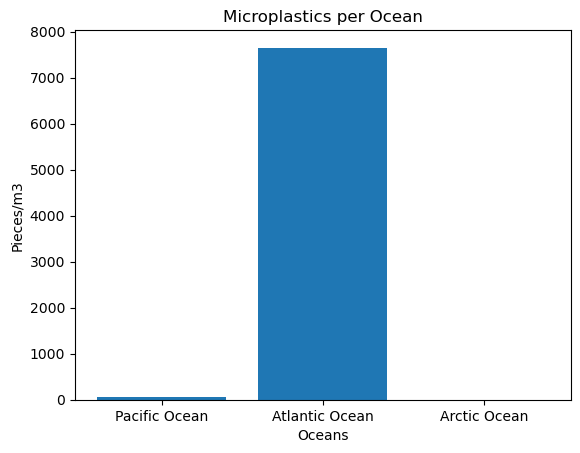

In [12]:
# per Ocean
measurement_per_ocean = clean_microplastics.groupby("Oceans")["Measurement"].mean()
plt.bar(clean_microplastics["Oceans"], clean_microplastics["Measurement"])
plt.title("Microplastics per Ocean")
plt.xlabel("Oceans")
plt.ylabel("Pieces/m3")
plt.show()

In [ ]:
# per region
measurement_per_regions = clean_microplastics.groupby("Regions")["Measurement"].mean()
measurement_per_regions

In [ ]:
# per region
measurement_per_year = clean_microplastics.groupby("Year")["Measurement"].mean()
measurement_per_year

In [ ]:
# Per Year
year_ocean_df = clean_microplastics.groupby("Year")["Oceans"].count()
year_ocean_df 

In [ ]:
#display results for microplastics over time

# sample_df = clean_microplastics_df.sample(n=1000)
# sample_df.head()

# x_values = sample_df["Year"]
# y_values = sample_df["Measurement"]
# plt.ylim(0,1)
# plt.bar(x_values,y_values)
# plt.show()